In [8]:
import torch
from torch import nn
from torchviz import make_dot, make_dot_from_trace

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

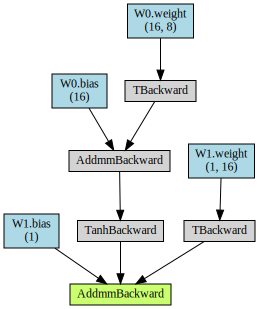

In [9]:
model = nn.Sequential()
model.add_module('W0', nn.Linear(8, 16))
model.add_module('tanh', nn.Tanh())
model.add_module('W1', nn.Linear(16, 1))

x = torch.randn(1,8)

make_dot(model(x), params=dict(model.named_parameters()))

#  Double Backpropagation

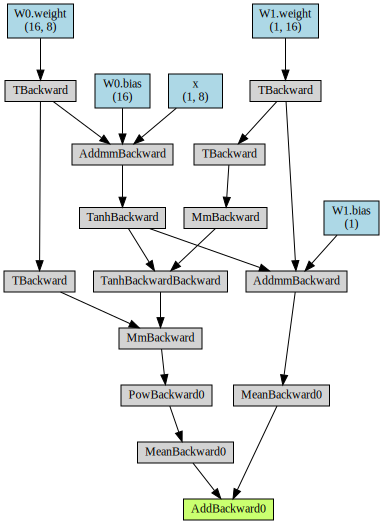

In [11]:
x = torch.randn(1,8).requires_grad_(True)

def double_backprop(inputs, net):
    y = net(x).mean()
    grad,  = torch.autograd.grad(y, x, create_graph=True, retain_graph=True)
    return grad.pow(2).mean() + y

make_dot(double_backprop(x, model), params=dict(list(model.named_parameters()) + [('x', x)]))

# AlexNet Visualization

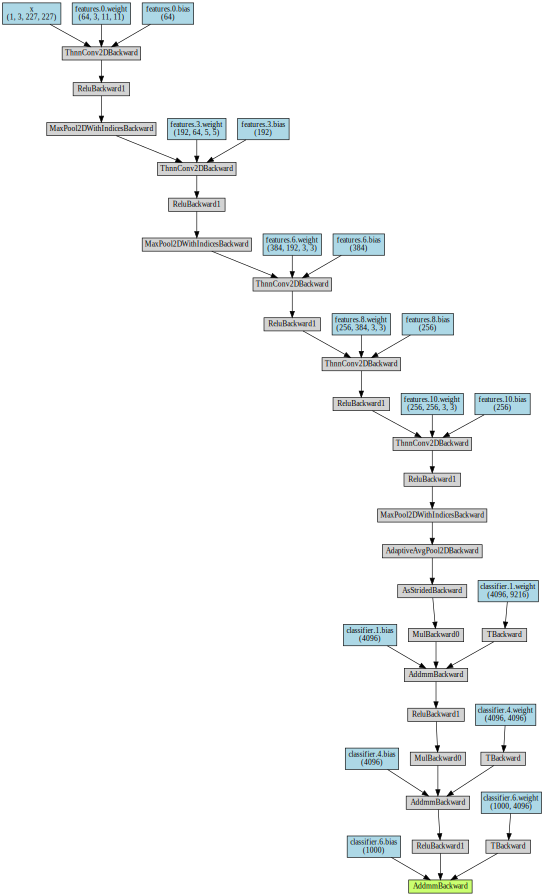

In [12]:
from torchvision.models import AlexNet

model = AlexNet()

x = torch.randn(1, 3, 227, 227).requires_grad_(True)
y = model(x)
make_dot(y, params=dict(list(model.named_parameters()) + [('x', x)]))

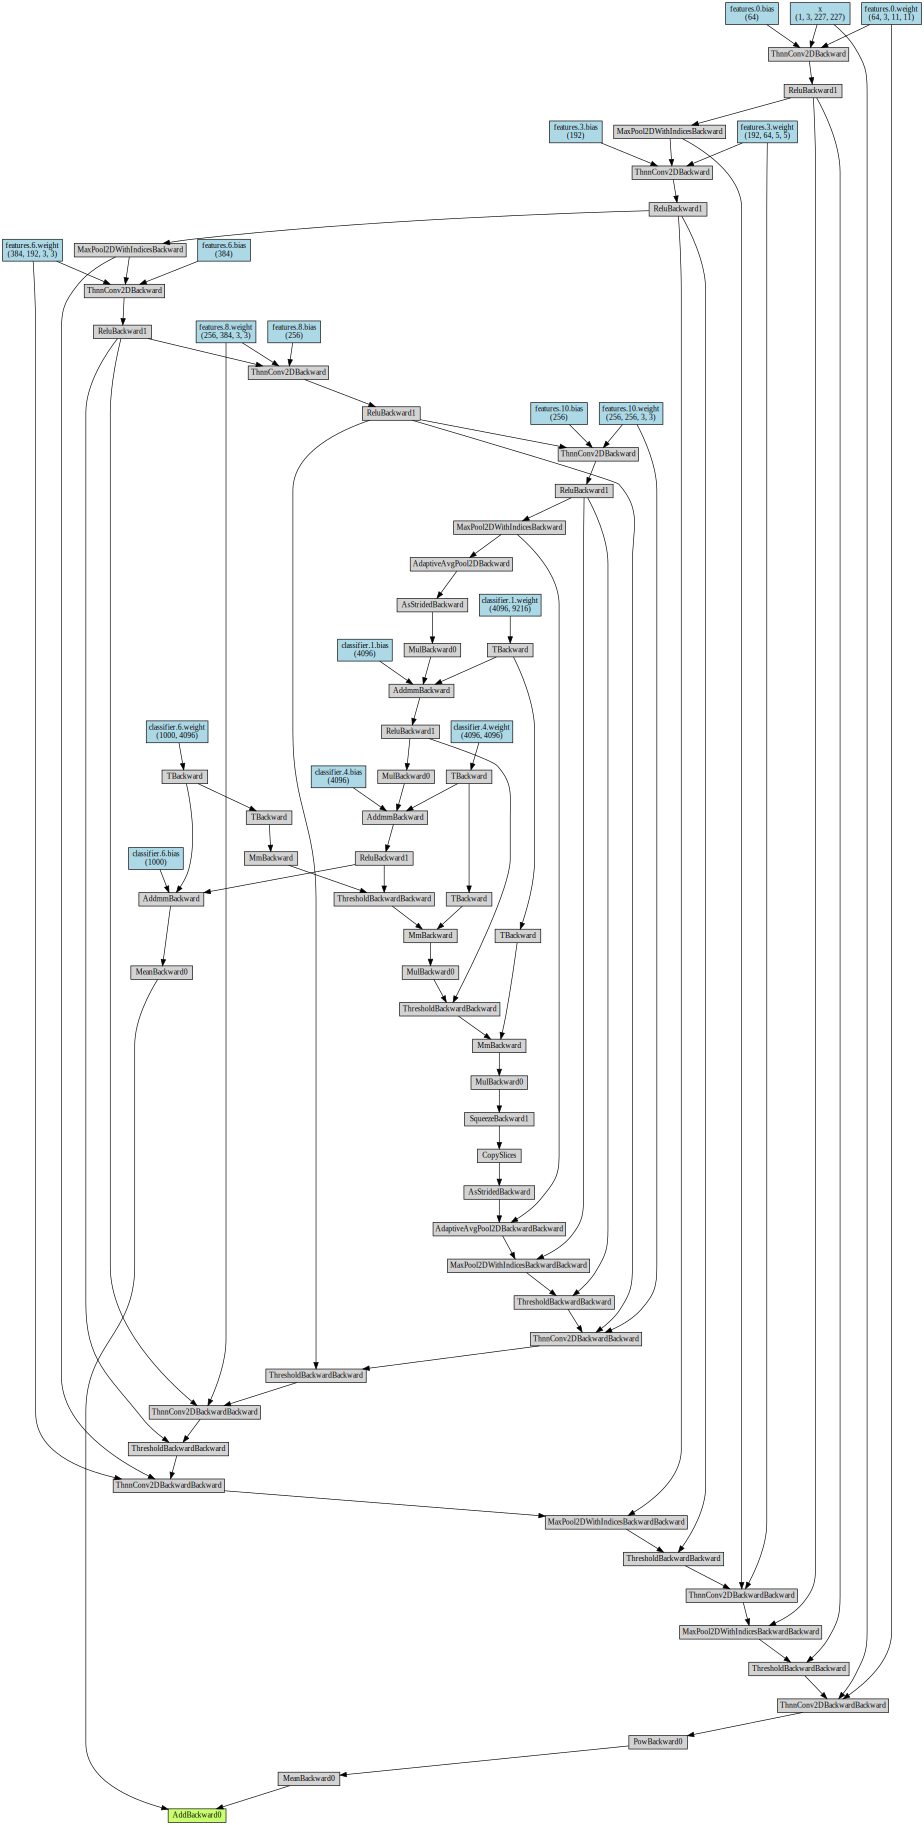

In [14]:
make_dot(double_backprop(x, model), params=dict(list(model.named_parameters()) + [('x', x)]))


# LSTM

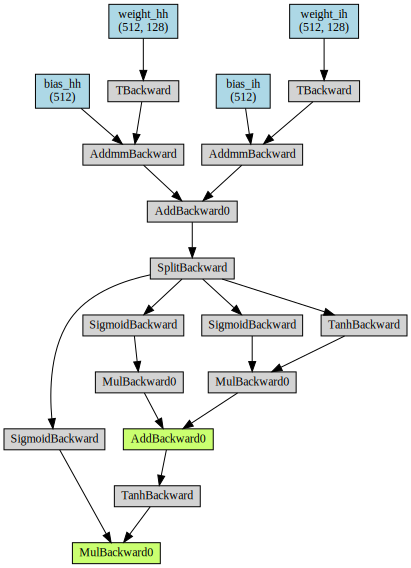

In [15]:

lstm_cell = nn.LSTMCell(128, 128)
x = torch.randn(1, 128)
make_dot(lstm_cell(x), params=dict(list(lstm_cell.named_parameters())))